In [1]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# skompiluj kod Stan
model = CmdStanModel(stan_file='home/code_1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


Excercise 1 - Generated Quantities Block

In [4]:
# wygeneruj wyniki
fit = model.sample(data={'M': 5}, 
                   fixed_param=True, 
                   iter_sampling=1000, 
                   iter_warmup=0, 
                   chains=1)

# utwórz pandas DataFrame
inference_data = az.from_cmdstanpy(fit)
df = inference_data.posterior.to_dataframe()

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


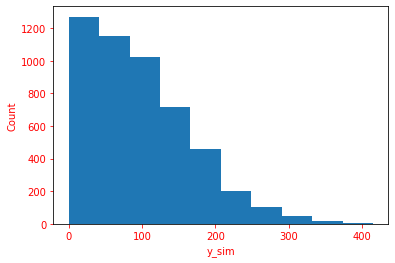

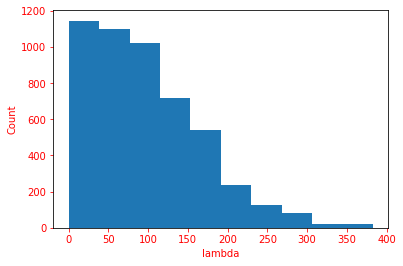

In [29]:
# wyświetl histogram y_sim
plt.hist(df['y_sim'], bins=10)
plt.xlabel('y_sim', color='red')
plt.ylabel('Count', color='red')
plt.tick_params(axis='both', colors='red')
plt.show()

# wyświetl histogram lambda
plt.hist(df['lambda'], bins=10)
plt.xlabel('lambda', color='red')
plt.ylabel('Count', color='red')
plt.tick_params(axis='both', colors='red')
plt.show()

Excercise 2 - Constraints on the data

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed

chain 3 |██████████| 00:00 Sampling completed


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status


chain 1 |██████▊   | 00:00 Iteration: 1200 / 2000 [ 60%]  (Sampling)
chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


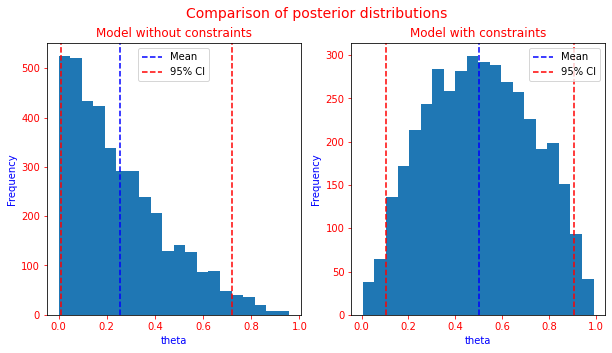

In [30]:
bern1 = CmdStanModel(stan_file='home/code_2.stan')
bern2 = CmdStanModel(stan_file='home/code_3.stan')

# Simulate data without constraints
N_1 = 2
y_1 = np.random.randint(0, 2, size=N_1)
data_1 = {'N': N_1, 'y': y_1}

# Simulate data with constraints
N_2 = 2
y_2 = np.random.randint(0, 2, size=N_2)
data_2 = {'N': N_2, 'y': y_2}

# Fit the models to the data
samp_bern1 = bern1.sample(data=data_1)
samp_bern2 = bern2.sample(data=data_2)

# Dataframe
inference_data1 = az.from_cmdstanpy(samp_bern1)
inference_data2 = az.from_cmdstanpy(samp_bern2)
df1 = inference_data1.posterior.to_dataframe()
df2 = inference_data2.posterior.to_dataframe()

# Plot the posterior distributions
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(df1['theta'], bins=20)
axs[0].axvline(df1['theta'].mean(), color='blue', linestyle='--', label='Mean')
axs[0].axvline(df1['theta'].quantile(0.025), color='red', linestyle='--', label='95% CI')
axs[0].axvline(df1['theta'].quantile(0.975), color='red', linestyle='--')
axs[0].set_title('Model without constraints', color='red')

axs[1].hist(df2['theta'], bins=20)
axs[1].axvline(df2['theta'].mean(), color='blue', linestyle='--', label='Mean')
axs[1].axvline(df2['theta'].quantile(0.025), color='red', linestyle='--', label='95% CI')
axs[1].axvline(df2['theta'].quantile(0.975), color='red', linestyle='--')
axs[1].set_title('Model with constraints', color='red')

for i, ax in enumerate(axs):
    ax.set_xlabel('theta', color='blue') # Zmiana koloru podpisu osi X
    ax.set_ylabel('Frequency', color='blue') # Zmiana koloru podpisu osi Y
    ax.tick_params(axis='both', colors='red')
    ax.legend()

fig.suptitle('Comparison of posterior distributions', fontsize=14, color= 'red')
plt.show()

Excercise 3 - Constraints on parameters

Unconstrained parameters

In [90]:
model_gm1 = CmdStanModel(stan_file='home/code_4.stan')
out_gamma1 = model_gm1.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
inference_data3 = az.from_cmdstanpy(out_gamma1)
df3 = inference_data3.posterior.to_dataframe()
out_gamma1.diagnose()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▏         | 00:00 Status


chain 1 |████▊     | 00:00 Iteration: 3200 / 7000 [ 45%]  (Sampling)


chain 1 |████████▊ | 00:00 Iteration: 6000 / 7000 [ 85%]  (Sampling)



chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /samples/code_4-20230323172853_1.csv, /samples/code_4-20230323172853_2.csv, /samples/code_4-20230323172853_3.csv, /samples/code_4-20230323172853_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n9489 of 24000 (39.54%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

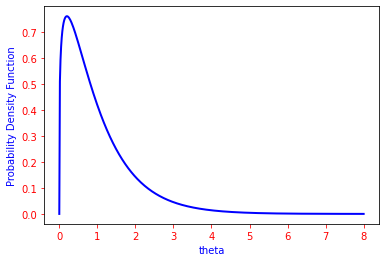

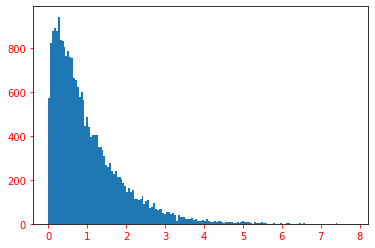

In [95]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2, color="blue")

plt.gca().set_xlabel("theta", color ='blue')
plt.gca().set_ylabel("Probability Density Function", color ='blue')
plt.tick_params(axis='both', colors='red')
plt.show()

## add histogram of theta samples with 160 bins
plt.hist(df3['theta'], bins=160)
plt.tick_params(axis='both', colors='red')
plt.show()


Constrained parameter

In [97]:
model_gm2 = CmdStanModel(stan_file='home/code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
inference_data32 = az.from_cmdstanpy(out_gamma2)
df32 = inference_data32.posterior.to_dataframe()
out_gamma2.diagnose()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▊         | 00:00 Iteration:  400 / 7000 [  5%]  (Warmup)


chain 1 |█████▊    | 00:00 Iteration: 3900 / 7000 [ 55%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       

INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /samples/code_5-20230323173437_1.csv, /samples/code_5-20230323173437_2.csv, /samples/code_5-20230323173437_3.csv, /samples/code_5-20230323173437_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n2 of 24000 (0.01%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

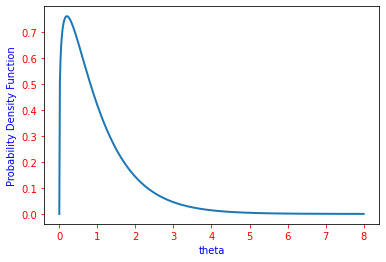

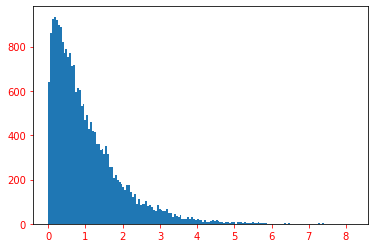

In [98]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples from the second model with 160 bins

plt.gca().set_xlabel("theta", color ='blue')
plt.gca().set_ylabel("Probability Density Function", color ='blue')
plt.tick_params(axis='both', colors='red')
plt.show()

## add histogram of theta samples with 160 bins
plt.hist(df32['theta'], bins=160)
plt.tick_params(axis='both', colors='red')
plt.show()

Excercise 4 - Selection of parameters using equation solving

In [59]:
model_tune = CmdStanModel(stan_file='home/code_6.stan')

F = 5
L = 7
y0 = 0.5

data={'y_guess':[y0],
        'theta':[(F+L)/2]}
tunes = model_tune.sample(data=data, fixed_param=True, iter_sampling=1, iter_warmup=0, chains = 1)
inference_data4 = az.from_cmdstanpy(tunes)
df4 = inference_data4.posterior.to_dataframe()
print("Standard deviation = ", df4['sigma'].iloc[0])
print("(F+L)/2 = ", (F+L)/2)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.



Standard deviation =  3.07915
(F+L)/2 =  6.0


Excercise 5 - different methods of defining models

In [72]:
model_samp_st = CmdStanModel(stan_file='home/code_7.stan')
model_log_target = CmdStanModel(stan_file='home/code_8.stan')
model_log_target_ind = CmdStanModel(stan_file='home/code_9.stan')
data = {'N': 5}
seed = 20032000
result_1 = model_samp_st.sample(data=data,seed=seed)
result_2 = model_log_target.sample(data=data,seed=seed)
result_3 = model_log_target_ind.sample(data=data,seed=seed)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                     
chain 2 |██████████| 00:00 Sampling completed                     
chain 3 |██████████| 00:00 Sampling completed                     
chain 4 |██████████| 00:00 Sampling completed                     


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                     
chain 2 |██████████| 00:00 Sampling completed                     
chain 3 |██████████| 00:00 Sampling completed                     
chain 4 |██████████| 00:00 Sampling completed                     

INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |█████████▌| 00:00 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


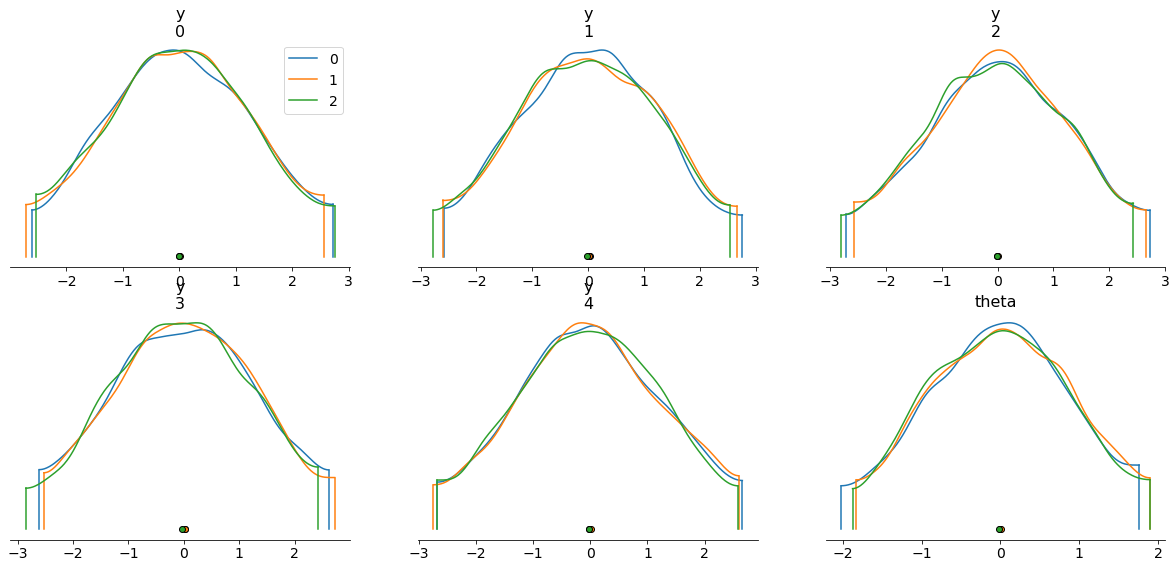

In [65]:
az.plot_density([result_1,result_2,result_3])
plt.show()

Excercise 6 - generated quantities post sampling

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [4] done processing


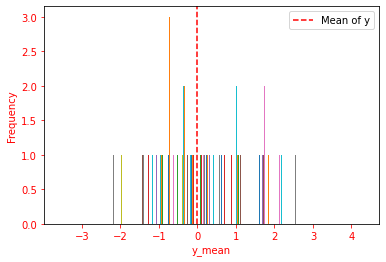

In [88]:
model_gq = CmdStanModel(stan_file='home/code_10.stan')
# fill in with chosen result from previous excercise
mean_of_y = model_gq.generate_quantities(data=data,
                                        mcmc_sample = result_1)
# Analiza średniej wartości y
inference_data6 = az.from_cmdstanpy(mean_of_y)
y_mean = inference_data6.posterior['y_mean']

# Histogram zmiennej y_mean
plt.hist(y_mean, bins=20)
plt.axvline(x=inference_data6.posterior.mean()['y_mean'], color='r', linestyle='--', label='Mean of y')
plt.xlabel('y_mean', color='r')
plt.ylabel('Frequency', color='r')
plt.tick_params(axis='both', colors='red')
plt.legend()
plt.show()